## Download Dataset

Acknowledgement: this ipynb is from https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb

In [1]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2025-03-22 16:54:50--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2025-03-22 16:54:51 (39.3 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



## Library

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## Data Plot

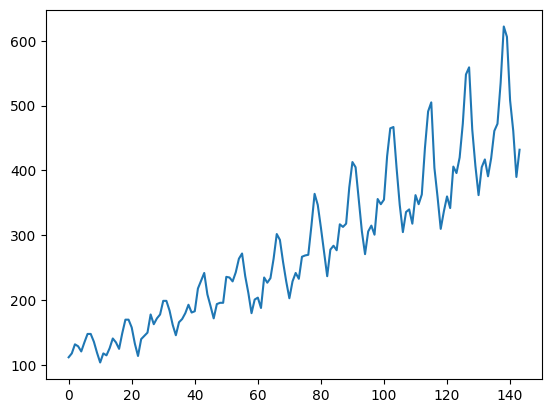

In [9]:
training_set = pd.read_csv('airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airline Passangers Data')
plt.show()
#print(training_set)

## Dataloading

In [10]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [11]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

## Training

In [15]:
num_epochs = 4000
learning_rate = 0.01

torch.manual_seed(2)

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
print(lstm)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    #print(outputs.shape)
    #print(trainY.shape)


    # obtain the loss function
    loss = criterion(outputs, trainY)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

LSTM(
  (lstm): LSTM(1, 2, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
)
Epoch: 0, loss: 0.04823
Epoch: 100, loss: 0.02158
Epoch: 200, loss: 0.02115
Epoch: 300, loss: 0.02111
Epoch: 400, loss: 0.02107
Epoch: 500, loss: 0.02103
Epoch: 600, loss: 0.02099
Epoch: 700, loss: 0.02095
Epoch: 800, loss: 0.02092
Epoch: 900, loss: 0.02088
Epoch: 1000, loss: 0.02085
Epoch: 1100, loss: 0.02081
Epoch: 1200, loss: 0.02078
Epoch: 1300, loss: 0.02075
Epoch: 1400, loss: 0.02071
Epoch: 1500, loss: 0.02068
Epoch: 1600, loss: 0.02065
Epoch: 1700, loss: 0.02062
Epoch: 1800, loss: 0.02059
Epoch: 1900, loss: 0.02056
Epoch: 2000, loss: 0.02053
Epoch: 2100, loss: 0.02050
Epoch: 2200, loss: 0.02047
Epoch: 2300, loss: 0.02045
Epoch: 2400, loss: 0.02042
Epoch: 2500, loss: 0.02039
Epoch: 2600, loss: 0.02037
Epoch: 2700, loss: 0.02034
Epoch: 2800, loss: 0.02031
Epoch: 2900, loss: 0.02029
Epoch: 3000, loss: 0.02026
Epoch: 3100, loss: 0.02024
Epoch: 3200, loss: 0.02022
Epoch: 3300, loss

## Testing for Airplane Passengers Dataset

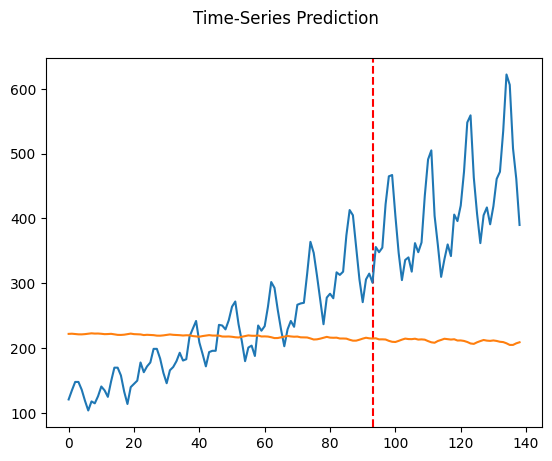

tensor(0.1787, grad_fn=<MseLossBackward0>)


In [16]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

test_loss = criterion(lstm(testX), testY)
print(test_loss)